### SparklyRGT Template: Baseline and Acquisition Analysis 

**Requirements**
* The data must be an excel file from MEDPC2XL (trial by trial data) 
* The data, sparklyRGT.py file, and this notebook must all be in the same folder

**Getting started: Please make a copy of this (sparklyRGT_template_2) for each analysis**
- Refer to sparklyRGT_documentation for function information
- Note: depending on your analysis, you will only have to complete certain sections of the sparklyRGT_documentation
- Note: feel free to create a personal template once you've become comfortable - this is just an example

In [1]:
import sparklyRGT as rgt 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import scipy.stats as stats
pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows',100)

I am being executed!


***

# 1) Load data into Python



In [2]:
#checks current working directory
os.getcwd()

#changes working directory to whatever is included in brackets
os.chdir("C:\\Users\\dexte\\sparklyRGT\\data") 

In [3]:
file_names = ['CH02_raw-free_S8-15.xlsx'] 

df = rgt.load_data(file_names)

df.head()


,MSN,StartDate,StartTime,Subject,Group,Box,Experiment,Comment,Session,Trial,...,Pun_Persev_H5,Pun_HeadEntry,Pun_Dur,Premature_Resp,Premature_Hole,Rew_Persev_H1,Rew_Persev_H2,Rew_Persev_H3,Rew_Persev_H4,Rew_Persev_H5
0,LossrGT_A-losscue_v1,2012-04-19 00:00:00,09:28:54,9,0,1,0,NaN,8,1.0,...,0,0,0,0,0,0,0,0,1,0
1,LossrGT_A-losscue_v1,2012-04-19 00:00:00,09:28:54,9,0,1,0,NaN,8,2.0,...,0,0,0,0,0,0,0,0,0,0
2,LossrGT_A-losscue_v1,2012-04-19 00:00:00,09:28:54,9,0,1,0,NaN,8,3.0,...,0,3,30,0,0,0,0,0,0,0
3,LossrGT_A-losscue_v1,2012-04-19 00:00:00,09:28:54,9,0,1,0,NaN,8,4.0,...,1,2,30,0,0,0,0,0,0,0
4,LossrGT_A-losscue_v1,2012-04-19 00:00:00,09:28:54,9,0,1,0,NaN,8,5.1,...,0,0,0,1,5,0,0,0,0,0


***
# 2A) Baseline & Acquisition Analysis


In [7]:
cued = [1, 5, 17, 21, 3, 7, 19, 23]

classic = [2, 6, 18, 22, 4, 8, 20, 24] 

outcome = [9, 11, 25, 27, 29, 31, 13, 15, 10, 12, 26, 28, 30, 32, 14, 16]

group_names = {0: 'cued',
              1: 'classic',
              2: 'outcome',} 

group_list = [cued, classic, outcome]

title = 'Plot' #for plotting

startsess = 8 #first session you would like to include in figures
endsess = 12 #last session you would like to include in figures

In [9]:
# df.MSN.unique()

## Data cleaning

### Check session numbers for each rat

In [10]:
rgt.check_sessions(df)

Subject  StartDate            Session
1        2012-04-19 00:00:00  8           89.1
         2012-05-19 00:00:00  9           88.1
         2012-06-19 00:00:00  10          89.0
         2012-07-19 00:00:00  11          93.0
         2012-10-19 00:00:00  12          93.1
         2012-11-19 00:00:00  13          87.1
         2012-12-19 00:00:00  14         101.0
         12/13/19             0           98.1
2        2012-04-19 00:00:00  8          103.0
         2012-05-19 00:00:00  9          112.0
         2012-06-19 00:00:00  10         108.0
         2012-07-19 00:00:00  11          79.0
         2012-10-19 00:00:00  12         120.0
         2012-11-19 00:00:00  13         110.0
         2012-12-19 00:00:00  14         117.0
         12/13/19             0          116.0
3        2012-04-19 00:00:00  8           28.0
         2012-05-19 00:00:00  9           54.1
         2012-06-19 00:00:00  10          70.1
         2012-07-19 00:00:00  11          67.0
         2012-10-19 00

### Drop/edit session numbers

In [11]:
# df2 = rgt.drop_sessions(df, [6])
df2 = rgt.edit_sessions(df, orig_sess = [0], new_sess = [15], subs = "all")

### Check that you dropped/edited the desired session(s)

In [12]:
rgt.check_sessions(df2) 

Subject  StartDate            Session
1        2012-04-19 00:00:00  8           89.1
         2012-05-19 00:00:00  9           88.1
         2012-06-19 00:00:00  10          89.0
         2012-07-19 00:00:00  11          93.0
         2012-10-19 00:00:00  12          93.1
         2012-11-19 00:00:00  13          87.1
         2012-12-19 00:00:00  14         101.0
         12/13/19             15          98.1
2        2012-04-19 00:00:00  8          103.0
         2012-05-19 00:00:00  9          112.0
         2012-06-19 00:00:00  10         108.0
         2012-07-19 00:00:00  11          79.0
         2012-10-19 00:00:00  12         120.0
         2012-11-19 00:00:00  13         110.0
         2012-12-19 00:00:00  14         117.0
         12/13/19             15         116.0
3        2012-04-19 00:00:00  8           28.0
         2012-05-19 00:00:00  9           54.1
         2012-06-19 00:00:00  10          70.1
         2012-07-19 00:00:00  11          67.0
         2012-10-19 00

## Data processing

### Calculate variables for each rat


In [13]:
df_sum = rgt.get_summary_data(df2) #change to df instead of df2 if you didn't do any session editing
df_sum 

,8P1,8P2,8P3,8P4,9P1,9P2,9P3,9P4,10P1,10P2,...,trial14,trial15,prem8,prem9,prem10,prem11,prem12,prem13,prem14,prem15
1,37.5,54.5455,6.81818,1.13636,25.5814,55.814,11.6279,6.97674,33.7079,57.3034,...,101.0,98.1,38.888889,34.586466,39.864865,23.140496,37.414966,35.820896,32.666667,33.103448
2,43.1373,39.2157,10.7843,6.86275,31.8182,57.2727,8.18182,2.72727,22.4299,73.8318,...,117.0,116.0,11.206897,4.273504,7.692308,4.819277,3.225806,15.384615,7.142857,11.450382
3,25,32.1429,17.8571,25,68.5185,9.25926,9.25926,12.963,61.7647,17.6471,...,58.0,51.1,67.816092,52.631579,39.655172,11.842105,31.111111,25.882353,40.206186,30.555556
4,41.7722,26.5823,21.519,10.1266,48.0916,46.5649,3.05344,2.29008,40.7692,57.6923,...,125.0,118.0,30.172414,10.204082,12.666667,3.053435,5.479452,13.385827,6.015038,7.812500
5,53.8462,18.4615,3.07692,24.6154,20.8955,25.3731,23.8806,29.8507,21.7391,17.3913,...,56.1,58.1,40.000000,30.927835,19.767442,16.250000,39.215686,37.755102,40.217391,32.142857
6,36.7647,36.7647,17.6471,8.82353,49.4118,16.4706,23.5294,10.5882,25.2427,51.4563,...,87.0,118.1,37.614679,26.724138,16.129032,14.049587,10.909091,20.155039,28.099174,18.055556
7,52.8302,5.66038,7.54717,33.9623,37.7358,0,3.77358,58.4906,23.4043,2.12766,...,54.0,58.0,30.000000,19.117647,15.789474,3.174603,15.000000,18.571429,16.923077,22.666667
8,11.4286,14.2857,60,14.2857,21.9512,14.6341,51.2195,12.1951,49.3333,16,...,74.0,96.0,11.363636,4.545455,7.317073,4.800000,31.764706,11.458333,15.909091,8.571429
9,49.4118,14.1176,28.2353,8.23529,47.4227,34.0206,13.4021,5.15464,22.6667,42.6667,...,70.0,78.1,20.560748,19.834711,11.235955,10.000000,22.680412,28.301887,39.655172,33.333333
10,20,26,32,22,26.8293,39.0244,19.5122,14.6341,10.6195,82.3009,...,42.0,43.1,43.956044,48.750000,16.176471,10.309278,64.367816,58.653846,45.454545,50.588235


### Get the risk status of the rats


In [ ]:
df_sum, risky, optimal = rgt.get_risk_status(df_sum, startsess, endsess)

print(df_sum[['mean_risk','risk_status']]) 
print(risky, optimal) 

### Export your data to an Excel file 


In [ ]:
rgt.export_to_excel(df_sum, groups = group_list, column_name = '', new_file_name = '', asin = True)

## Calculate means and SEMs for your experimental groups



In [14]:
mean_scores, SEM = rgt.get_means_sem(df_sum, groups = group_list, group_names = group_names)
mean_scores
# SEM

,8P1,8P2,8P3,8P4,9P1,9P2,9P3,9P4,10P1,10P2,...,trial14,trial15,prem8,prem9,prem10,prem11,prem12,prem13,prem14,prem15
cued,31.7637,28.9909,19.9726,19.2728,30.9024,24.7681,21.1099,23.2197,28.5505,25.947,...,67.8,64.075,42.7631,35.2925,27.0072,21.0033,30.242,28.9244,36.8525,32.611
classic,44.8173,27.0741,18.631,9.47769,45.2561,34.3783,13.1471,7.21847,38.1601,48.1775,...,92.6375,101.05,30.6164,17.6732,21.2163,13.9346,22.6723,17.304,21.5632,17.0062
outcome,28.3033,37.0482,20.4586,14.1898,28.6947,40.8966,16.63,13.7788,23.1599,48.4643,...,72.0813,78.5938,23.4233,22.6627,21.4933,15.7905,26.2826,27.1493,32.377,28.5597


# 2B) Baseline & Acquisition Analysis: Plotting


## Bar plot of P1-P4 % choice


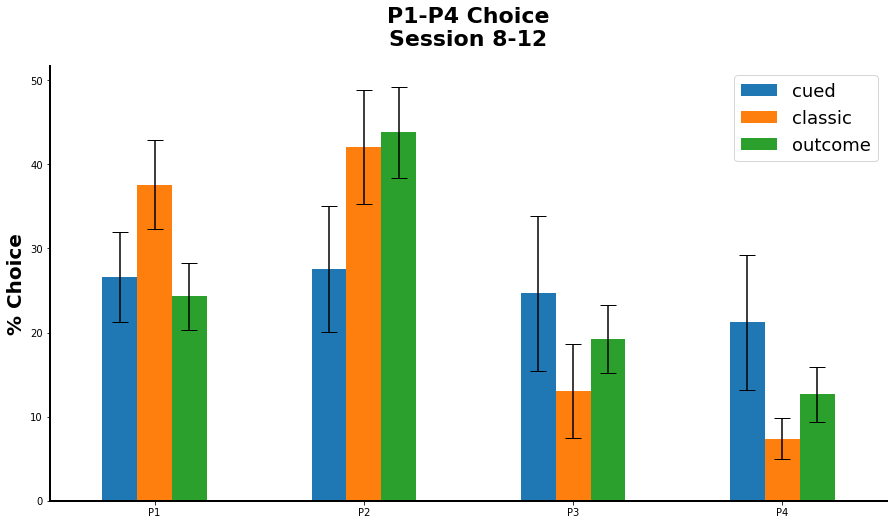

In [15]:
rgt.choice_bar_plot(startsess, endsess, mean_scores, SEM)

#To save figure:
# plt.savefig('BH07 Choice S29-30',facecolor = 'white')

## Line plot of other variables


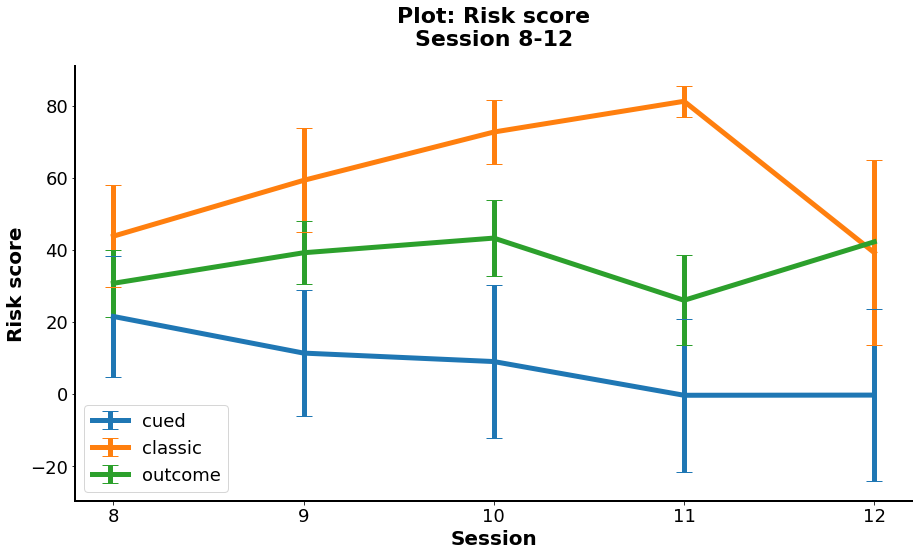

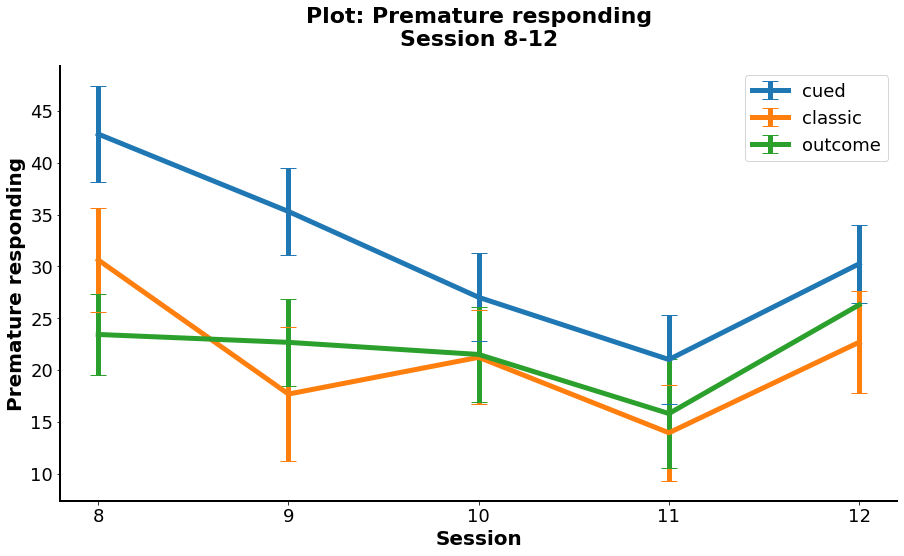

In [16]:
rgt.rgt_plot('risk', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Risk score') 

rgt.rgt_plot('prem', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Premature responding') 

## Bar plot of other variables



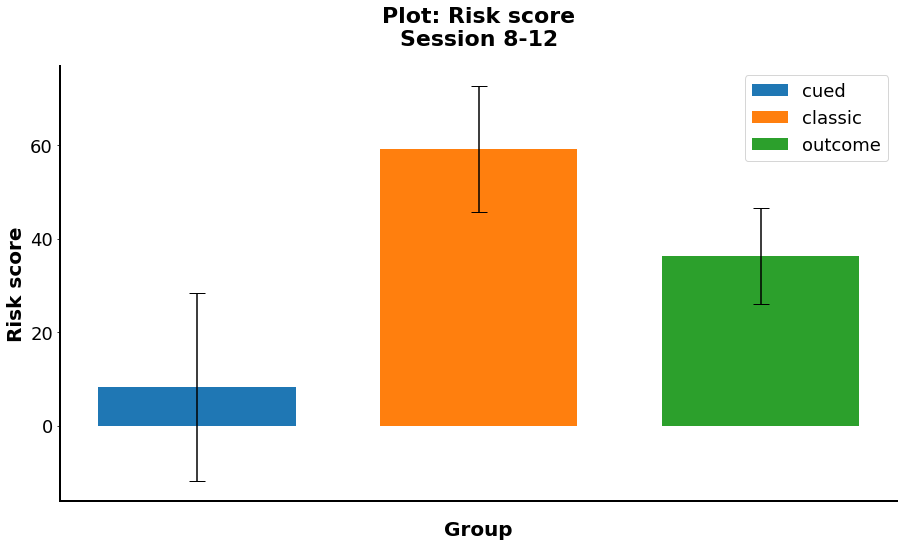

In [17]:
rgt.rgt_bar_plot('risk', startsess, endsess, title, mean_scores, SEM, group_names, y_label = 'Risk score')